# IMPORT LIBRARY

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyRegressor


# DATA IMPORT

In [4]:
columnname = pd.read_excel("features.xlsx")
column = columnname["degiskenismi"]


In [5]:
x_train = pd.read_excel("x_train.xlsx", names = column)
x_test = pd.read_excel("x_test.xlsx", names = column)
y_train = pd.read_excel("y_train.xlsx", names = ["activity"]) -1
y_test = pd.read_excel("y_test.xlsx", names = ["activity"]) -1


In [6]:
subject_test = pd.read_excel("subject_test.xlsx", names = ["subject"])
subject_train = pd.read_excel("subject_train.xlsx", names = ["subject"])


In [51]:
train = pd.concat([x_train,y_train,subject_train], axis = 1)

In [55]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",activity,subject
0,0.28,-0.02,-0.12,-1.00,-0.98,-0.96,-1.00,-0.97,-0.96,-0.94,...,-0.86,0.05,-0.01,-0.73,0.70,-0.84,0.18,-0.05,4,1
1,0.28,-0.02,-0.11,-1.00,-0.97,-0.98,-1.00,-0.96,-0.98,-0.94,...,-0.76,-0.12,0.18,0.10,0.81,-0.85,0.18,-0.05,4,1
2,0.28,-0.03,-0.12,-1.00,-0.98,-0.99,-1.00,-0.98,-0.99,-0.94,...,-0.48,-0.04,-0.01,0.64,-0.49,-0.85,0.18,-0.05,4,1
3,0.28,-0.02,-0.12,-1.00,-0.98,-0.99,-1.00,-0.98,-0.99,-0.94,...,-0.70,0.12,0.12,0.69,-0.62,-0.85,0.19,-0.04,4,1
4,0.28,-0.01,-0.11,-1.00,-0.99,-1.00,-1.00,-0.99,-1.00,-0.94,...,-0.84,0.08,-0.14,0.28,-0.37,-0.85,0.18,-0.04,4,1


In [52]:
test = pd.concat([x_test,y_test,subject_test], axis = 1)

In [13]:
# import libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'Dejavu Sans'

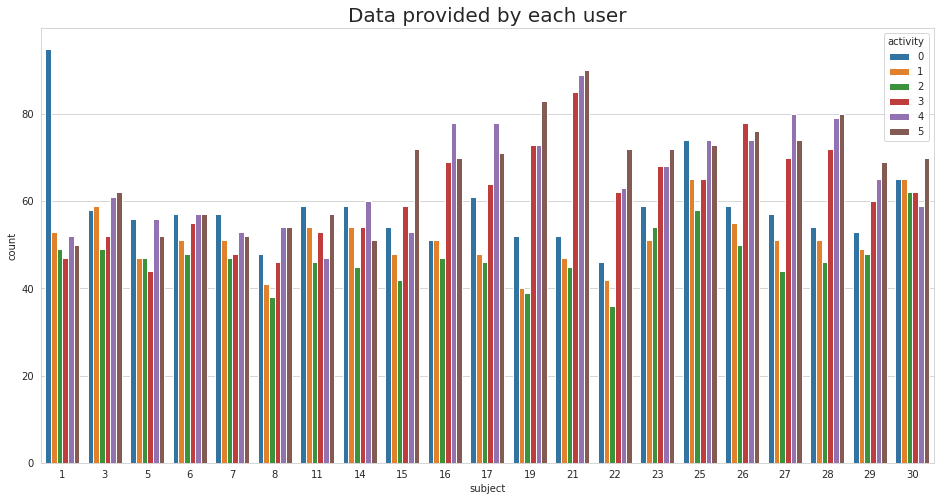

In [14]:
plt.figure(figsize=(16,8))
plt.title('Data provided by each user', fontsize=20)
sns.countplot(x='subject',hue='activity', data = train)
plt.show()

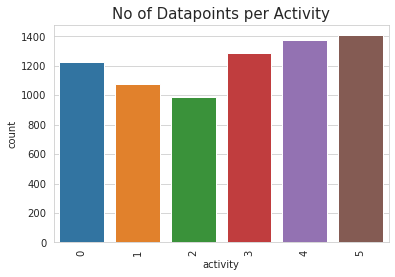

In [16]:
plt.title('No of Datapoints per Activity', fontsize=15)
sns.countplot(train.activity)
plt.xticks(rotation=90)
plt.show()

In [56]:
columns = train.columns

# Removing '()' from column names
columns = columns.str.replace('[()]','')
columns = columns.str.replace('[-]', '')
columns = columns.str.replace('[,]','')

train.columns = columns
test.columns = columns

test.columns

Index(['tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ', 'tBodyAccstdX',
       'tBodyAccstdY', 'tBodyAccstdZ', 'tBodyAccmadX', 'tBodyAccmadY',
       'tBodyAccmadZ', 'tBodyAccmaxX',
       ...
       'fBodyBodyGyroJerkMagkurtosis', 'angletBodyAccMeangravity',
       'angletBodyAccJerkMeangravityMean', 'angletBodyGyroMeangravityMean',
       'angletBodyGyroJerkMeangravityMean', 'angleXgravityMean',
       'angleYgravityMean', 'angleZgravityMean', 'activity', 'subject'],
      dtype='object', length=563)

### Save this dataframe in a csv files ###

In [18]:
train.to_csv('f_train.csv', index=False)
test.to_csv('f_test.csv', index=False)

# Exploratory Data Analysis #

## 1. Featuring Engineering from Domain Knowledge

In [20]:

    # Static and Dynamic Activities

        # In static activities (sit, stand, lie down) motion information will not be very useful.
        # In the dynamic activities (Walking, WalkingUpstairs,WalkingDownstairs) motion info will be significant.

## 2. Stationary and Moving activities are completely different

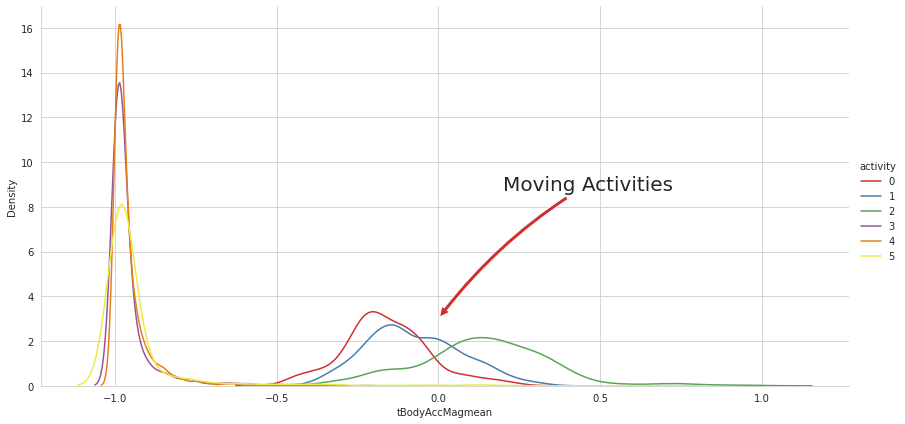

In [57]:
sns.set_palette("Set1", desat=0.80)
facetgrid = sns.FacetGrid(train, hue='activity', size=6,aspect=2)
facetgrid.map(sns.distplot,'tBodyAccMagmean', hist=False)\
    .add_legend()
plt.annotate("Stationary Activities", xy=(-0.956,17), xytext=(-0.9, 23), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))

plt.annotate("Moving Activities", xy=(0,3), xytext=(0.2, 9), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))
plt.show()

In [33]:
#0 WALKING      -
#1 WALKING_UPSTAIRS     
#2 WALKING_DOWNSTAIRS
#3 SITTING 
#4 STANDING            
#5 LAYING

In [58]:
## MOVING ACTIVIES
train.activity = train.activity.replace(0,"WALKING")
train.activity = train.activity.replace(1,"WALKING_UPSTAIRS")
train.activity = train.activity.replace(2,"WALKING_DOWNSTAIRS")

test.activity = test.activity.replace(0,"WALKING")
test.activity = test.activity.replace(1,"WALKING_UPSTAIRS")
test.activity = test.activity.replace(2,"WALKING_DOWNSTAIRS")


## STATIONARY ACTIVITIES
train.activity = train.activity.replace(3,"SITTING")
train.activity = train.activity.replace(4,"STANDING")
train.activity = train.activity.replace(5,"LAYING")

test.activity = test.activity.replace(3,"SITTING")
test.activity = test.activity.replace(4,"STANDING")
test.activity = test.activity.replace(5,"LAYING")

In [49]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",activity,subject
0,0.28,-0.02,-0.12,-1.00,-0.98,-0.96,-1.00,-0.97,-0.96,-0.94,...,-0.86,0.05,-0.01,-0.73,0.70,-0.84,0.18,-0.05,STANDING,1
1,0.28,-0.02,-0.11,-1.00,-0.97,-0.98,-1.00,-0.96,-0.98,-0.94,...,-0.76,-0.12,0.18,0.10,0.81,-0.85,0.18,-0.05,STANDING,1
2,0.28,-0.03,-0.12,-1.00,-0.98,-0.99,-1.00,-0.98,-0.99,-0.94,...,-0.48,-0.04,-0.01,0.64,-0.49,-0.85,0.18,-0.05,STANDING,1
3,0.28,-0.02,-0.12,-1.00,-0.98,-0.99,-1.00,-0.98,-0.99,-0.94,...,-0.70,0.12,0.12,0.69,-0.62,-0.85,0.19,-0.04,STANDING,1
4,0.28,-0.01,-0.11,-1.00,-0.99,-1.00,-1.00,-0.99,-1.00,-0.94,...,-0.84,0.08,-0.14,0.28,-0.37,-0.85,0.18,-0.04,STANDING,1


In [32]:
# for plotting purposes taking datapoints of each activity to a different dataframe
df1 = train[train['activity']==0]
df2 = train[train['activity']==1]
df3 = train[train['activity']==2]
df4 = train[train['activity']==3]
df5 = train[train['activity']==4]
df6 = train[train['activity']==5]

<AxesSubplot:title={'center':'Dynamic Activities(closer view)'}, xlabel='tBodyAccMagmean', ylabel='Density'>

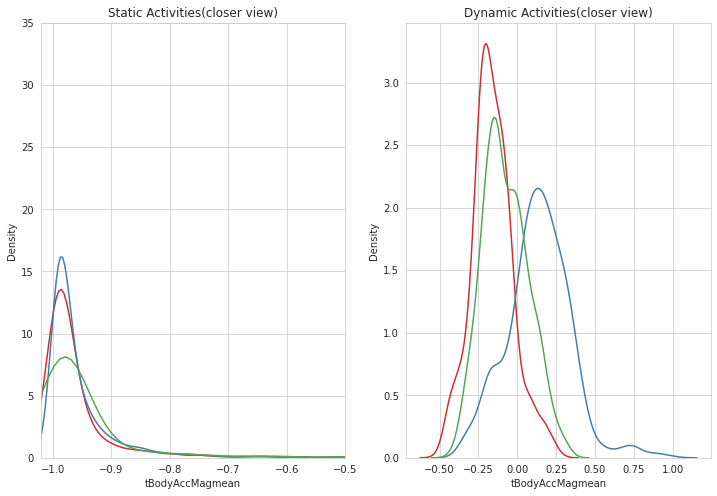

In [59]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.title("Static Activities(closer view)")
sns.distplot(train[train["activity"]=="SITTING"]['tBodyAccMagmean'],hist = False, label = 'Sitting')
sns.distplot(train[train["activity"]=="STANDING"]['tBodyAccMagmean'],hist = False,label = 'Standing')
sns.distplot(train[train["activity"]=="LAYING"]['tBodyAccMagmean'],hist = False, label = 'Laying')
plt.axis([-1.02, -0.5, 0, 35])
plt.subplot(1,2,2)
plt.title("Dynamic Activities(closer view)")
sns.distplot(train[train["activity"]=="WALKING"]['tBodyAccMagmean'],hist = False, label = 'Sitting')
sns.distplot(train[train["activity"]=="WALKING_DOWNSTAIRS"]['tBodyAccMagmean'],hist = False,label = 'Standing')
sns.distplot(train[train["activity"]=="WALKING_UPSTAIRS"]['tBodyAccMagmean'],hist = False, label = 'Laying')

## 3. Magnitude of an acceleration can saperate it well

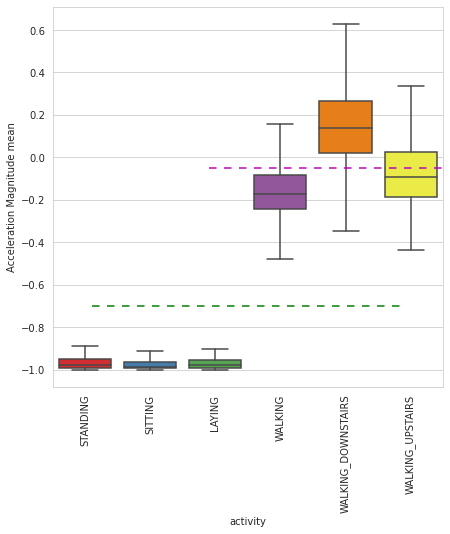

In [61]:
plt.figure(figsize=(7,7))
sns.boxplot(x='activity', y='tBodyAccMagmean',data=train, showfliers=False, saturation=1)
plt.ylabel('Acceleration Magnitude mean')
plt.axhline(y=-0.7, xmin=0.1, xmax=0.9,dashes=(5,5), c='g')
plt.axhline(y=-0.05, xmin=0.4, dashes=(5,5), c='m')
plt.xticks(rotation=90)
plt.show()

## Observations:

### If tAccMean is < -0.8 then the Activities are either Standing or Sitting or Laying.
### If tAccMean is > -0.6 then the Activities are either Walking or WalkingDownstairs or WalkingUpstairs.
### If tAccMean > 0.0 then the Activity is WalkingDownstairs.
### We can classify 75% the Acitivity labels with some errors.

## 4. Position of GravityAccelerationComponants also matters

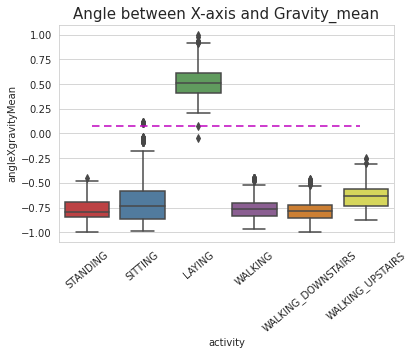

In [62]:
sns.boxplot(x='activity', y='angleXgravityMean', data=train)
plt.axhline(y=0.08, xmin=0.1, xmax=0.9,c='m',dashes=(5,3))
plt.title('Angle between X-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 40)
plt.show()

## Observations:

### If angleX,gravityMean > 0 then Activity is Laying.
### We can classify all datapoints belonging to Laying activity with just a single if else statement.

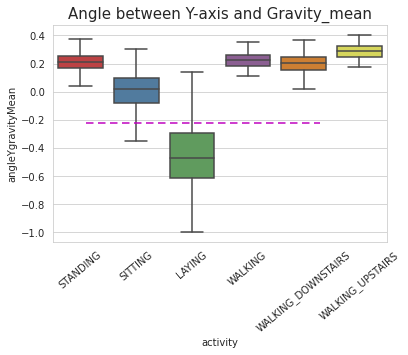

In [63]:
sns.boxplot(x='activity', y='angleYgravityMean', data = train, showfliers=False)
plt.title('Angle between Y-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 40)
plt.axhline(y=-0.22, xmin=0.1, xmax=0.8, dashes=(5,3), c='m')
plt.show()

# Apply t-sne on the data


In [65]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

### Here we will see these datapoints in 2 dimensions and try to observe the behaviour of the datapoints

In [66]:
# performs t-sne with different perplexity values and their repective plots..

def perform_tsne(X_data, y_data, perplexities, n_iter=1000, img_name_prefix='t-sne'):
        
    for index,perplexity in enumerate(perplexities):
        # perform t-sne
        print('\nperforming tsne with perplexity {} and with {} iterations at max'.format(perplexity, n_iter))
        X_reduced = TSNE(verbose=2, perplexity=perplexity).fit_transform(X_data)
        print('Done..')
        
        # prepare the data for seaborn         
        print('Creating plot for this t-sne visualization..')
        df = pd.DataFrame({'x':X_reduced[:,0], 'y':X_reduced[:,1] ,'label':y_data})
        
        # draw the plot in appropriate place in the grid
        sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, size=8,\
                   palette="Set1",markers=['^','v','s','o', '1','2'])
        plt.title("perplexity : {} and max_iter : {}".format(perplexity, n_iter))
        img_name = img_name_prefix + '_perp_{}_iter_{}.png'.format(perplexity, n_iter)
        print('saving this plot as image in present working directory...')
        plt.savefig(img_name)
        plt.show()
        print('Done')


performing tsne with perplexity 5 and with 1000 iterations at max
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 7351 samples in 0.010s...
[t-SNE] Computed neighbors for 7351 samples in 2.768s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7351
[t-SNE] Computed conditional probabilities for sample 2000 / 7351
[t-SNE] Computed conditional probabilities for sample 3000 / 7351
[t-SNE] Computed conditional probabilities for sample 4000 / 7351
[t-SNE] Computed conditional probabilities for sample 5000 / 7351
[t-SNE] Computed conditional probabilities for sample 6000 / 7351
[t-SNE] Computed conditional probabilities for sample 7000 / 7351
[t-SNE] Computed conditional probabilities for sample 7351 / 7351
[t-SNE] Mean sigma: 0.961422
[t-SNE] Computed conditional probabilities in 0.060s
[t-SNE] Iteration 50: error = 114.0259552, gradient norm = 0.0222436 (50 iterations in 3.897s)
[t-SNE] Iteration 100: error = 97.3903503, gradient norm = 0.0155731 (50 iterations in 

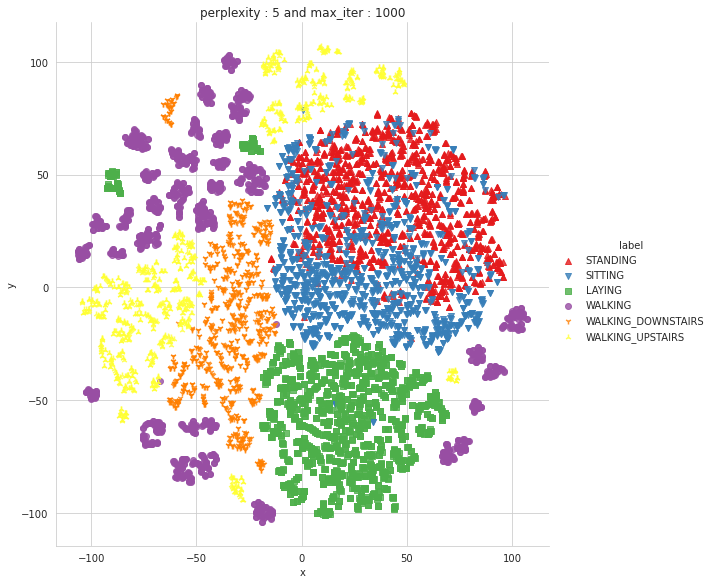

Done

performing tsne with perplexity 10 and with 1000 iterations at max
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 7351 samples in 0.015s...
[t-SNE] Computed neighbors for 7351 samples in 2.838s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7351
[t-SNE] Computed conditional probabilities for sample 2000 / 7351
[t-SNE] Computed conditional probabilities for sample 3000 / 7351
[t-SNE] Computed conditional probabilities for sample 4000 / 7351
[t-SNE] Computed conditional probabilities for sample 5000 / 7351
[t-SNE] Computed conditional probabilities for sample 6000 / 7351
[t-SNE] Computed conditional probabilities for sample 7000 / 7351
[t-SNE] Computed conditional probabilities for sample 7351 / 7351
[t-SNE] Mean sigma: 1.133804
[t-SNE] Computed conditional probabilities in 0.136s
[t-SNE] Iteration 50: error = 105.9837189, gradient norm = 0.0191186 (50 iterations in 4.732s)
[t-SNE] Iteration 100: error = 91.0961609, gradient norm = 0.0101134 (50 iteratio

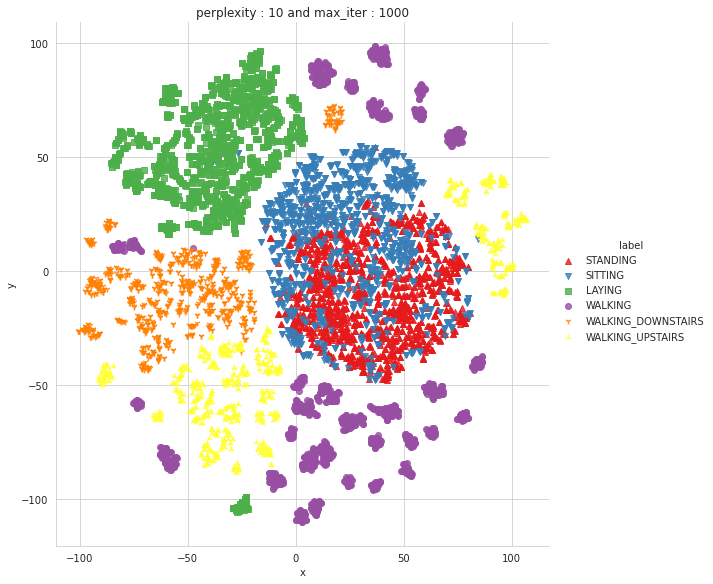

Done

performing tsne with perplexity 20 and with 1000 iterations at max
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 7351 samples in 0.012s...
[t-SNE] Computed neighbors for 7351 samples in 3.495s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7351
[t-SNE] Computed conditional probabilities for sample 2000 / 7351
[t-SNE] Computed conditional probabilities for sample 3000 / 7351
[t-SNE] Computed conditional probabilities for sample 4000 / 7351
[t-SNE] Computed conditional probabilities for sample 5000 / 7351
[t-SNE] Computed conditional probabilities for sample 6000 / 7351
[t-SNE] Computed conditional probabilities for sample 7000 / 7351
[t-SNE] Computed conditional probabilities for sample 7351 / 7351
[t-SNE] Mean sigma: 1.274318
[t-SNE] Computed conditional probabilities in 0.219s
[t-SNE] Iteration 50: error = 97.1448288, gradient norm = 0.0241472 (50 iterations in 6.323s)
[t-SNE] Iteration 100: error = 83.8989487, gradient norm = 0.0060457 (50 iteration

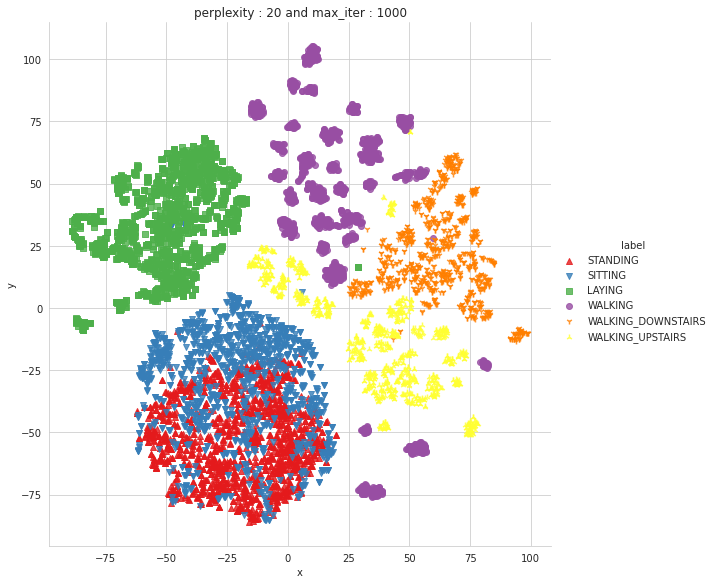

Done


In [69]:
X_pre_tsne = train.drop(['subject', 'activity'], axis=1)
y_pre_tsne = train['activity']
perform_tsne(X_data = X_pre_tsne,y_data=y_pre_tsne, perplexities =[5,10,20])